In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def generate_gaussian_simpsons_paradox(n_subgroups=3, n_samples=1000, correlated=True):
    
    means = np.linspace(0, 10, n_subgroups)
    means = np.vstack((means, means)).T
    weights = np.ones(n_subgroups)
    weights /= np.sum(weights)
    covs = [np.random.uniform(0.5,0.8) for _ in range(n_subgroups)]
    if correlated:
        covs = np.array([np.array([[1,-c], [-c,1]]) for c in covs])
    else:
        covs = np.array([np.array([[400,-400*c], [-400*c, 400]]) for c in covs])
    


    samples = []

    for sg, (mean, cov, w) in enumerate(zip(means, covs, weights)):
        n = int(round(n_samples * w))
        sample = np.random.multivariate_normal(mean=mean, cov=cov, size=n)
        sample = pd.DataFrame(sample, columns=["Exercise", "Cholesterol"])
        sample["age"] = sg
        samples.append(sample)
        
    df = pd.concat(samples)
    
    return df

In [269]:
df = generate_gaussian_simpsons_paradox(n_subgroups=10, n_samples=10000)

print("Total Covariance: {:.3f}".format(df[["Exercise", "Cholesterol"]].cov().iloc[0,1]))
for age in df.age.unique():
    print("Subgroup {} covariance: {:.3f}".format(age,df[df.age==age][["Exercise", "Cholesterol"]].cov().iloc[0,1]))
    

Total Covariance: 9.512
Subgroup 0 covariance: -0.624
Subgroup 1 covariance: -0.772
Subgroup 2 covariance: -0.669
Subgroup 3 covariance: -0.726
Subgroup 4 covariance: -0.641
Subgroup 5 covariance: -0.592
Subgroup 6 covariance: -0.921
Subgroup 7 covariance: -0.557
Subgroup 8 covariance: -0.531
Subgroup 9 covariance: -0.618


Text(0, 0.5, 'Age')

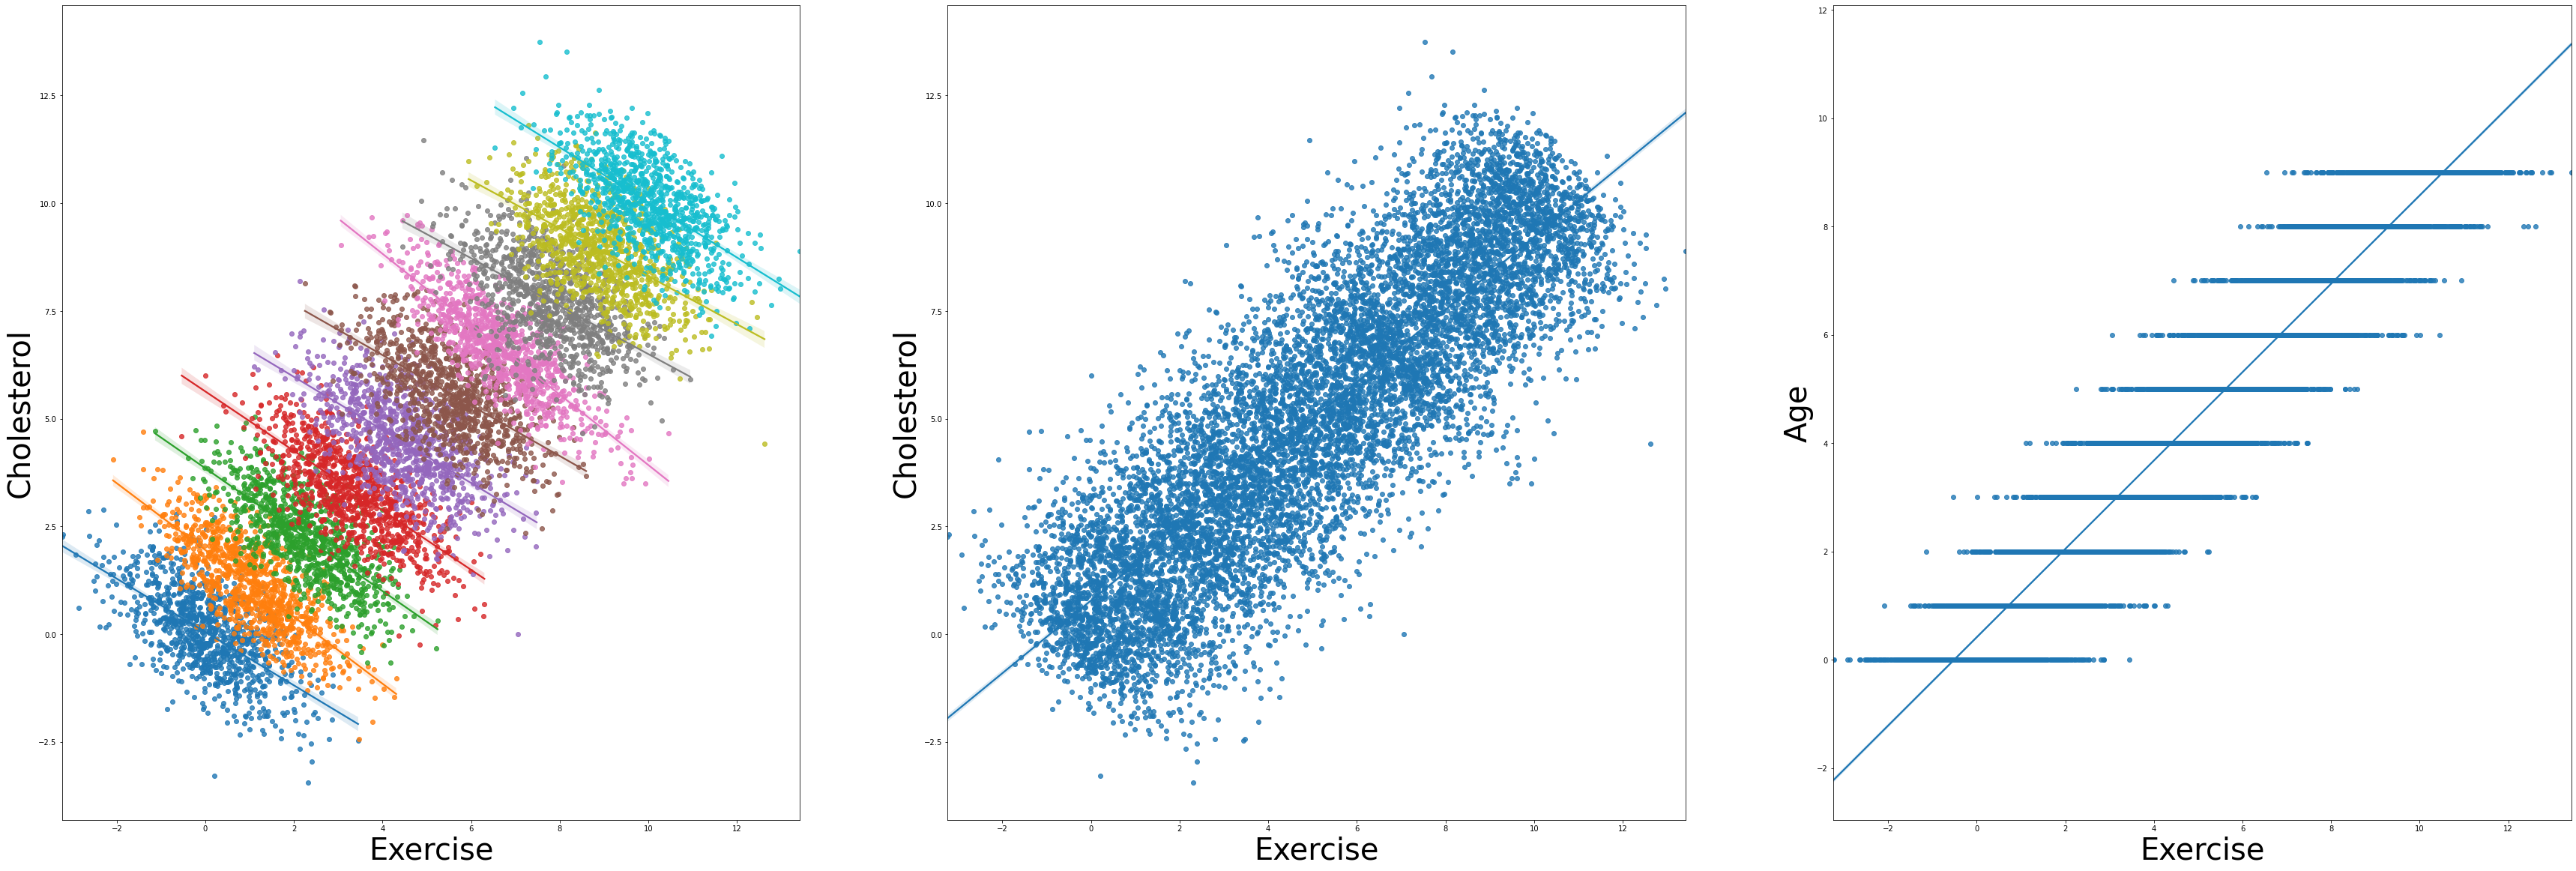

In [270]:

fig, ax = plt.subplots(1,3,figsize=(60,20))

# plt.xlim(-6,6);
# plt.ylim(-6,6);

for age in df.age.unique():
    sns.regplot(data=df[df.age==age], x="Exercise", y="Cholesterol", ax=ax[0])
sns.regplot(data=df, x="Exercise",y="Cholesterol", ax=ax[1])
ax[0].set_xlabel("Exercise", fontsize=40)
ax[1].set_xlabel("Exercise", fontsize=40)
ax[0].set_ylabel("Cholesterol", fontsize=40)
ax[1].set_ylabel("Cholesterol", fontsize=40)
sns.regplot(data=df, x="Exercise",y="age", ax=ax[2])
ax[2].set_xlabel("Exercise", fontsize=40)
ax[2].set_ylabel("Age", fontsize=40)



In [271]:

df = generate_gaussian_simpsons_paradox(n_subgroups=10, n_samples=10000, correlated=False)

print("Total Covariance: {:.3f}".format(df[["Exercise", "Cholesterol"]].cov().iloc[0,1]))
for age in df.age.unique():
    print("Subgroup {} covariance: {:.3f}".format(age,df[df.age==age][["Exercise", "Cholesterol"]].cov().iloc[0,1]))
    

Total Covariance: -247.112
Subgroup 0 covariance: -216.906
Subgroup 1 covariance: -286.033
Subgroup 2 covariance: -244.730
Subgroup 3 covariance: -187.809
Subgroup 4 covariance: -329.242
Subgroup 5 covariance: -275.041
Subgroup 6 covariance: -283.921
Subgroup 7 covariance: -257.652
Subgroup 8 covariance: -190.337
Subgroup 9 covariance: -302.926


Text(0, 0.5, 'Age')

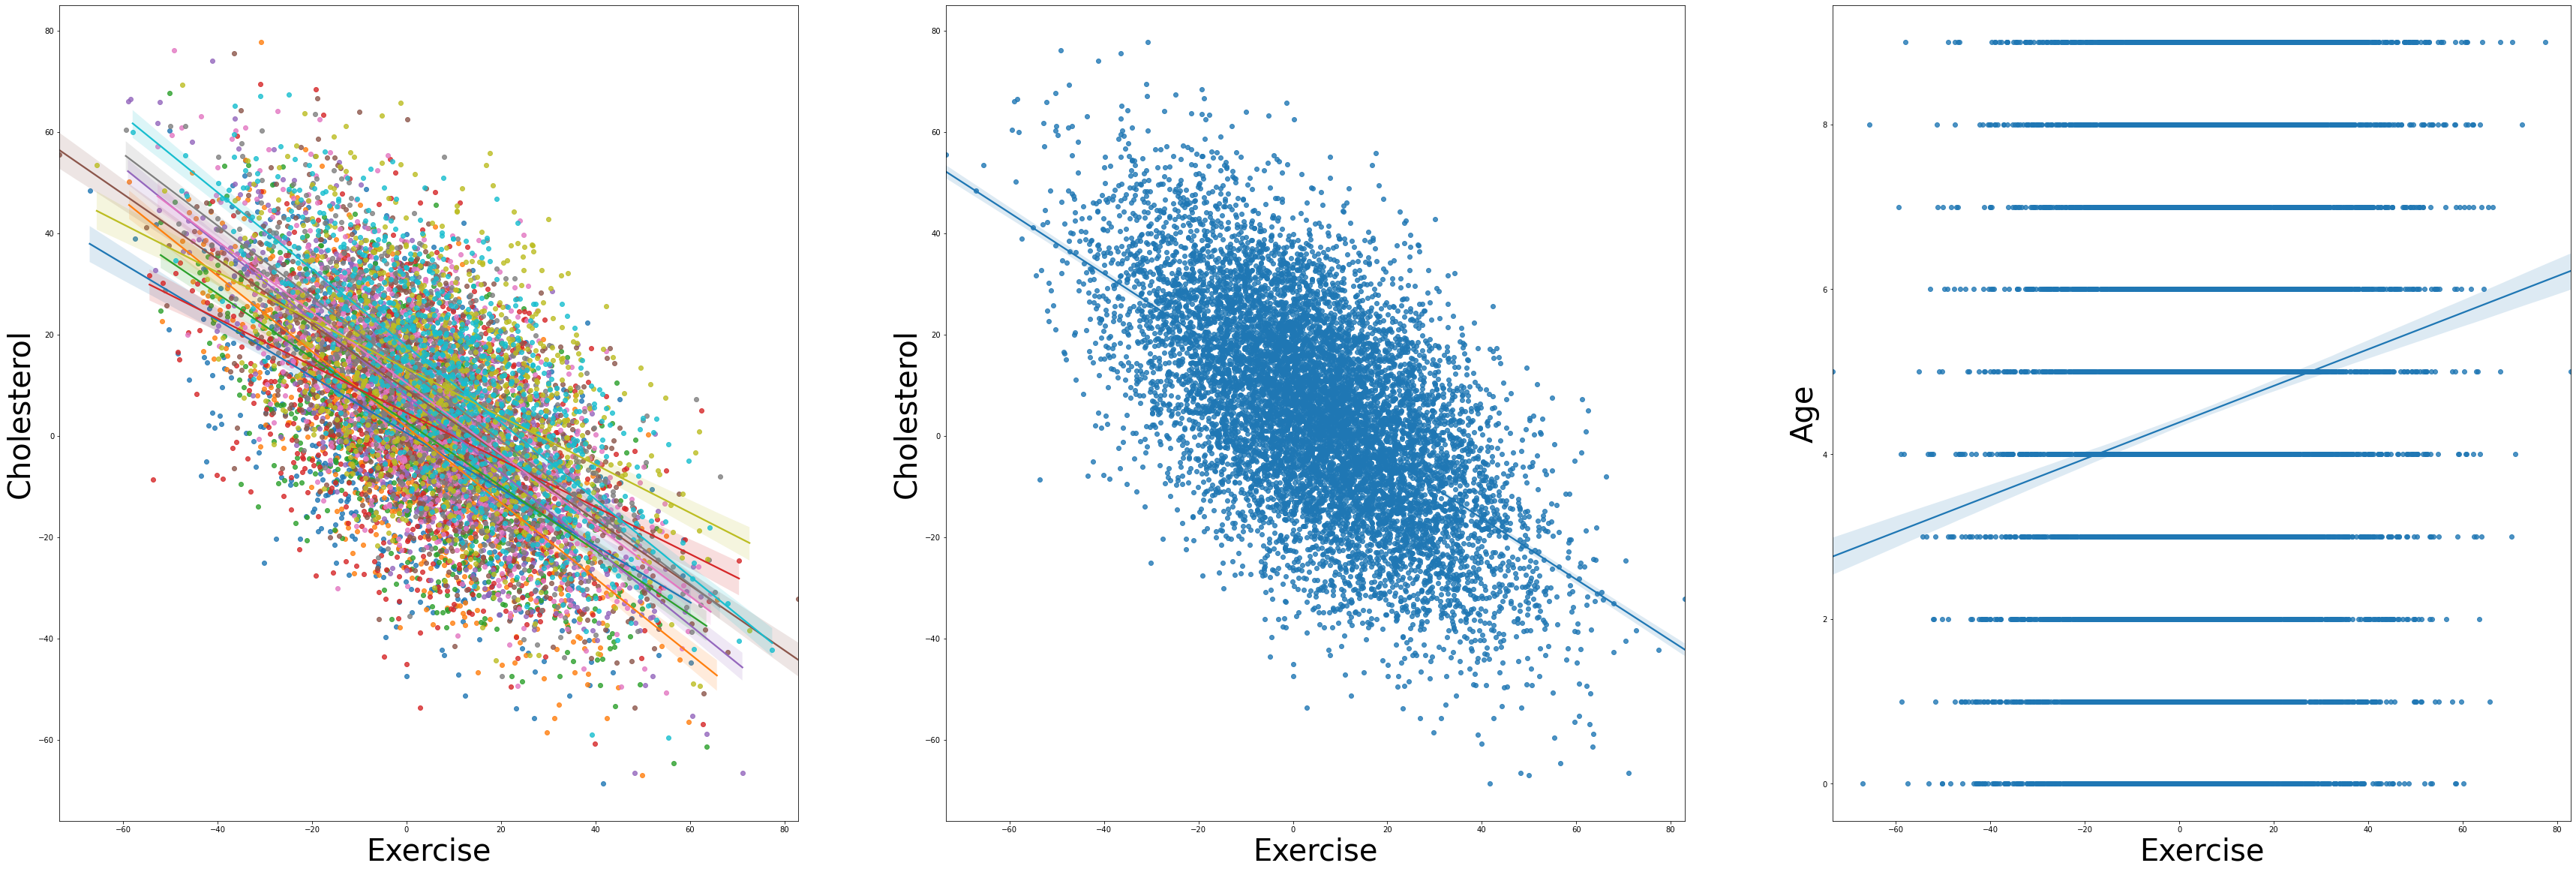

In [272]:

fig, ax = plt.subplots(1,3,figsize=(60,20))

# plt.xlim(-6,6);
# plt.ylim(-6,6);

for age in df.age.unique():
    sns.regplot(data=df[df.age==age], x="Exercise", y="Cholesterol", ax=ax[0])
sns.regplot(data=df, x="Exercise",y="Cholesterol", ax=ax[1])
ax[0].set_xlabel("Exercise", fontsize=40)
ax[1].set_xlabel("Exercise", fontsize=40)
ax[0].set_ylabel("Cholesterol", fontsize=40)
ax[1].set_ylabel("Cholesterol", fontsize=40)
sns.regplot(data=df, x="Exercise",y="age", ax=ax[2])
ax[2].set_xlabel("Exercise", fontsize=40)
ax[2].set_ylabel("Age", fontsize=40)

